In [1]:
from dolfin import *
import numpy as np
%matplotlib inline

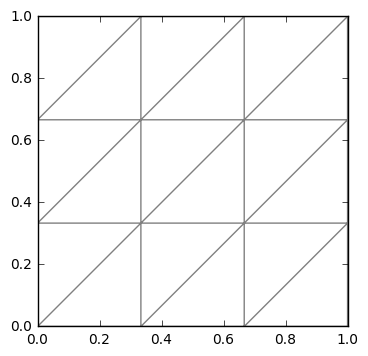

In [2]:
mesh = UnitSquareMesh(3, 3)
plot(mesh, interactive=True)

In [9]:
mesh = UnitSquareMesh(3, 3)

h = []
e = []

class MyF(Expression):
    def __init__(self, element):
        self.element = element

    def eval(self, value, x):
        if x[0] <= 0.5:
            value[0] = np.sin(2*np.pi*x[0])*np.sin(2*np.pi*x[1])
        else:
            value[0] = 1.0
    
    def value_shape(self):
        return (1,)

nmeshes = 5
for i in range(nmeshes):
    print '...running mesh %d of %d' % (i, nmeshes)
    mesh = refine(mesh)
    V = FunctionSpace(mesh, 'Lagrange', 1)
    
    #f = Expression('sin(x[0] * pi) * sin(x[1] * pi)', element=V.ufl_element())
    f = MyF(element=V.ufl_element())

    # project f into the finite element space V
    fv = project(f, V)

    # check the norm of the error
    err = errornorm(f, fv, norm_type='l2', mesh=mesh)

    e.append(err)
    h.append(mesh.hmax())

e = np.array(e)
h = np.array(h)
rate = np.log(e[1:] / e[:-1]) / np.log(h[1:] / h[:-1])
print e
print rate

...running mesh 0 of 5
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
...running mesh 1 of 5
...running mesh 2 of 5
...running mesh 3 of 5
...running mesh 4 of 5
[ 0.06276172  0.04437629  0.03137876  0.02218813  0.01568938]
[ 0.50009578  0.50000077  0.50000001  0.5       ]


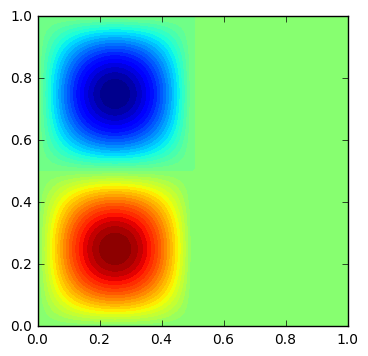

In [4]:
plot(fv, scalarbar=True)